In [3]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
feature_vectors = pd.read_csv("39-features-wambiana.csv")
labels_true = feature_vectors["class"]
labels_true

0       anthrophony
1       anthrophony
2       anthrophony
3       anthrophony
4       anthrophony
           ...     
2232          other
2233          other
2234          other
2235          other
2236          other
Name: class, Length: 2237, dtype: object

In [4]:
feature_vectors["class"] = feature_vectors["class"].str.replace('other', str(0))
feature_vectors["class"] = feature_vectors["class"].str.replace('biophony', str(1))
feature_vectors["class"] = feature_vectors["class"].str.replace('geophony', str(2))
feature_vectors["class"] = feature_vectors["class"].str.replace('anthrophony', str(3))
y_km = feature_vectors["class"]
y_km = y_km.values
y_km

array(['3', '3', '3', ..., '0', '0', '0'], dtype=object)

In [5]:
feature_vectors = feature_vectors.drop(columns=["class"])
feature_vectors = feature_vectors.iloc[:, 0:13].values
feature_vectors

array([[0.30236609, 0.47671811, 0.87848198, ..., 0.65084708, 0.09424063,
        0.32766343],
       [0.29588817, 0.50094867, 0.85854202, ..., 0.66270674, 0.19503928,
        0.19713736],
       [0.33044387, 0.53633509, 0.77284898, ..., 0.58628362, 0.02225896,
        0.25389438],
       ...,
       [0.3017586 , 0.67512305, 0.53211044, ..., 0.16957708, 0.41965072,
        0.38854256],
       [0.35216836, 0.70140494, 0.51256943, ..., 0.15547327, 0.42957292,
        0.35627631],
       [0.48355306, 0.75698342, 0.42341653, ..., 0.20542165, 0.47175349,
        0.38722066]])

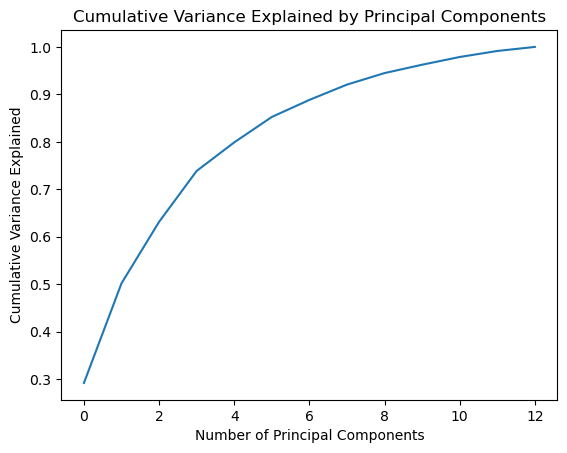

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have your input dataset stored in X
X = feature_vectors

# Perform PCA to reduce dimensionality while capturing adequate variance
pca = PCA().fit(feature_vectors)

# Plot the cumulative variance explained by principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.show()


In [56]:
pca = PCA(7)  # project from 39 to 2 dimensions
projected = pca.fit_transform(feature_vectors)
print(feature_vectors.shape)
print(projected.shape)

(2237, 13)
(2237, 7)


In [48]:
tsne = TSNE(n_components=3, learning_rate=150, perplexity=50, verbose=2, angle=0.1, random_state=0)
projected_tsne = tsne.fit_transform(projected)

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2237 samples in 0.002s...
[t-SNE] Computed neighbors for 2237 samples in 0.051s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2237
[t-SNE] Computed conditional probabilities for sample 2000 / 2237
[t-SNE] Computed conditional probabilities for sample 2237 / 2237
[t-SNE] Mean sigma: 0.042145
[t-SNE] Computed conditional probabilities in 0.049s
[t-SNE] Iteration 50: error = 68.3612213, gradient norm = 0.0551204 (50 iterations in 0.504s)
[t-SNE] Iteration 100: error = 60.6254578, gradient norm = 0.0058834 (50 iterations in 0.378s)
[t-SNE] Iteration 150: error = 60.3561363, gradient norm = 0.0017019 (50 iterations in 0.347s)
[t-SNE] Iteration 200: error = 60.3252487, gradient norm = 0.0004914 (50 iterations in 0.347s)
[t-SNE] Iteration 250: error = 60.3131981, gradient norm = 0.0012522 (50 iterations in 0.339s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.313198
[t-SNE] Iteration 300: err

In [100]:
from sklearn.cluster import DBSCAN

# Create a DBSCAN instance with specified parameters
eps = 0.042  # Neighborhood distance threshold 0.042
min_samples = 5  # Minimum number of samples in a neighborhood 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the DBSCAN model to the data
dbscan.fit(projected)

# Get the cluster labels assigned by DBSCAN
cluster_labels = dbscan.labels_

# Get the number of clusters (excluding noise points)
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

# Get the indices of the core samples (non-noise points)
core_samples_indices = dbscan.core_sample_indices_

# Print the cluster labels and number of clusters
print("Cluster Labels:", cluster_labels)
print("Number of Clusters:", n_clusters)

Cluster Labels: [-1 -1 -1 ... -1 -1 -1]
Number of Clusters: 4


In [101]:
# # Apply DBSCAN for clustering
# dbscan = DBSCAN(eps=0.025, min_samples=2)
# cluster_labels = dbscan.fit_predict(projected)


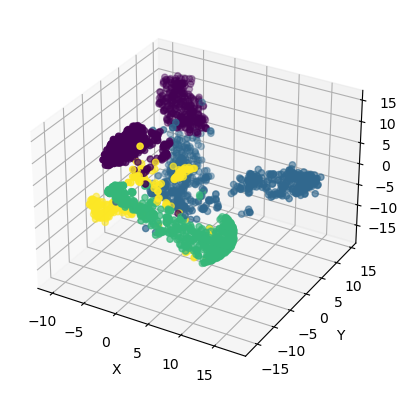

In [102]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points with ground truth labels
ax.scatter(projected_tsne[:, 0], projected_tsne[:, 1], projected_tsne[:, 2], c=y_km.astype(int), cmap='viridis', label='Ground Truth')

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# Show the 3D plot
plt.show()

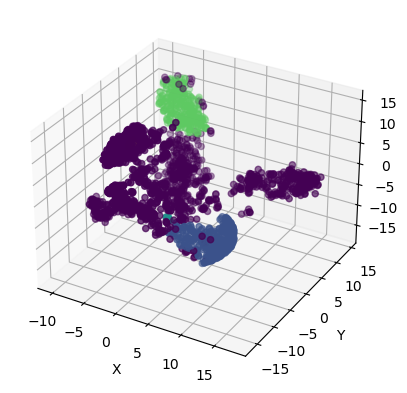

: 

In [103]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points with predicted cluster labels
ax.scatter(projected_tsne[:, 0], projected_tsne[:, 1], projected_tsne[:, 2], c=cluster_labels.astype(int), cmap='viridis', label='Predicted')

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the 3D plot
plt.show()